**Actividad 3: evaluación de la segmentación**

La finalidad de la actividad es la segmentación de elementos de fondo (background). Para ello se han utilizado imágenes de monedas sobre fondo oscuro. Durante el desarrollo de la actividad se han implementado tres métodos diferentes de segmentación:


1.   Método de segmentación basado en umbralización.
2.   Método de segmentación basado en regiones.
3.   Método de segmentación basado en contornos.





In [ ]:
#declaración de importaciones
import numpy as np 
import matplotlib.pyplot as plt 
from skimage import io
from skimage import data, exposure 
from skimage.exposure import histogram 
from skimage.color import rgb2gray

from skimage.color import rgb2grey

DESCARGA DE LAS IMÁGENES

Las imágenes utilizadas en la actividad pueden adquirirse de la red mediante el uso del comando curl:

!curl -s -o monedas0.jpg https://i.stack.imgur.com/fDUGQ.jpg 

!curl -s -o monedas1.jpg https://pyimagesearch.com/wp-content/uploads/2015/10/watershed_coins_01.jpg 

!curl -s -o monedas2.jpg https://johnloomis.org/ece563/notes/BinaryImages/coins/coins3.jpg 

!curl -s -o monedas3.jpg https://media.cheggcdn.com/media/f11/f1168b85-30e0-43dd-ad3d-6770a4517193/phpHqs22Y.png 

!curl -s -o monedas4.jpg https://media.cheggcdn.com/media/9f8/9f8cf283-1d7b-4c6a-8727-8cf82a04b67f/php9D7V86.png 

coins = ['coins0.jpg','coins1.jpg','coins2.jpg','coins3.jpg','coins4.jpg']

A continuación se lee la imagen según el índice deseado y como paso preparatorio de la imagen se incluye la conversión a escala de grises manteniendo el rango de valores entre 0 y 255.

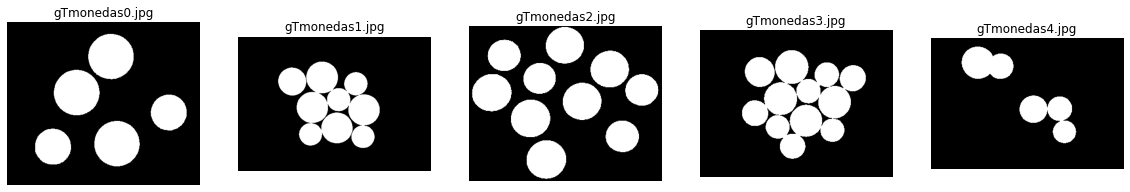

In [ ]:
!curl -s -o coins0.jpg https://i.stack.imgur.com/fDUGQ.jpg

!curl -s -o coins1.jpg https://pyimagesearch.com/wp-content/uploads/2015/10/watershed_coins_01.jpg

!curl -s -o coins2.jpg https://johnloomis.org/ece563/notes/BinaryImages/coins/coins3.jpg

!curl -s -o coins3.jpg https://media.cheggcdn.com/media/f11/f1168b85-30e0-43dd-ad3d-6770a4517193/phpHqs22Y.png

!curl -s -o coins4.jpg https://media.cheggcdn.com/media/9f8/9f8cf283-1d7b-4c6a-8727-8cf82a04b67f/php9D7V86.png

coins = ['coins0.jpg','coins1.jpg','coins2.jpg','coins3.jpg','coins4.jpg']

indexImg = 1 # Para probar otras imagenes cambiar el indice por 0,1,2,3 o 4. 
img_original = io.imread(coins[indexImg]) 
coins = (rgb2grey(img_original)*256).astype('uint8')

!curl -s -o gTmonedas0.jpg https://raw.githubusercontent.com/azarkiel/PercepcionComputacional/main/groundthruth/gt_monedas0.jpg
!curl -s -o gTmonedas1.jpg https://raw.githubusercontent.com/azarkiel/PercepcionComputacional/main/groundthruth/gt_monedas1.jpg
!curl -s -o gTmonedas2.jpg https://raw.githubusercontent.com/azarkiel/PercepcionComputacional/main/groundthruth/gt_monedas2.jpg
!curl -s -o gTmonedas3.jpg https://raw.githubusercontent.com/azarkiel/PercepcionComputacional/main/groundthruth/gt_monedas3.jpg
!curl -s -o gTmonedas4.jpg https://raw.githubusercontent.com/azarkiel/PercepcionComputacional/main/groundthruth/gt_monedas4.jpg
imgsGroundTruth = ['gTmonedas0.jpg','gTmonedas1.jpg','gTmonedas2.jpg','gTmonedas3.jpg','gTmonedas4.jpg']
plt.figure(figsize=(20,10))
plt.subplot(1,5,1),plt.imshow(io.imread(imgsGroundTruth[0]));plt.title('gTmonedas0.jpg'), plt.axis('off')
plt.subplot(1,5,2),plt.imshow(io.imread(imgsGroundTruth[1]));plt.title('gTmonedas1.jpg'), plt.axis('off')
plt.subplot(1,5,3),plt.imshow(io.imread(imgsGroundTruth[2]));plt.title('gTmonedas2.jpg'), plt.axis('off')
plt.subplot(1,5,4),plt.imshow(io.imread(imgsGroundTruth[3]));plt.title('gTmonedas3.jpg'), plt.axis('off')
plt.subplot(1,5,5),plt.imshow(io.imread(imgsGroundTruth[4]));plt.title('gTmonedas4.jpg'), plt.axis('off')
plt.show()

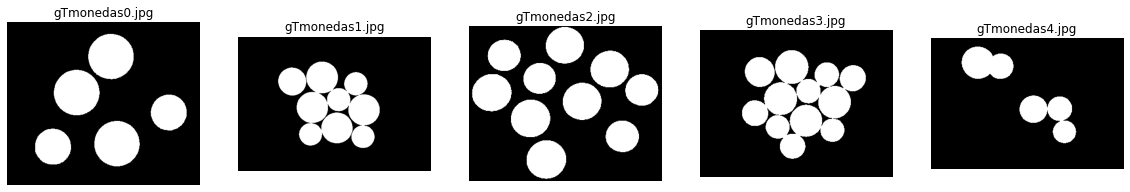

In [ ]:
indexImg = 1 # Para probar otras imagenes cambiar el indice por 0,1,2,3 o 4. imagenOriginal = io.imread(imagenes[indiceImagen])
coins = (rgb2grey(img_original)*256).astype('uint8')

**Segmentación de umbralización**

La forma más sencaccesible de segmentar imágenes es mediante el método de umbralización. En el problema de esta actividad se ha escogido un valor umbral basado en el histograma de valores grises que se encuentra entre la montaña de pixeles oscuros del fondo y los pixeles claros de las monedas. El valor umbral depende directamente de los tonos de grises que posean el fondo y las monedas. Por lo tanto, para cada imagen seleccionada se ha establecido un valor umbral propio. Hay que destacar que este método tiene la contrapartida de que puede pasar por alto partes signicativas de las monedas o incluso fusionar partes del fondo con las monedas:

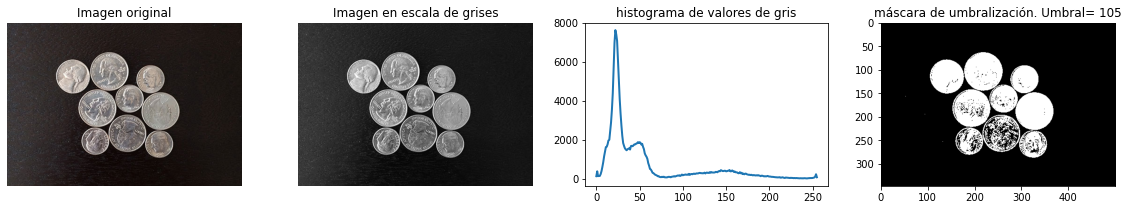

In [ ]:
hist, hist_centers = histogram(coins) 
valorUmbral = [100, 105, 35, 75, 100] #Esta lista contiene el valor umbral para cada una de las imágenes. 
mascaraUmbralizacion = coins > valorUmbral[indexImg] # Esta máscara será la que utilicemos a la hora de la evaluación

plt.figure(figsize=(20,3)) 
plt.subplot(1,4,1)
plt.imshow(img_original, cmap=plt.cm.gray)
plt.title('Imagen original')
plt.axis('off')
plt.subplot(1,4,2)
plt.imshow(coins, cmap=plt.cm.gray)
plt.title('Imagen en escala de grises')
plt.axis('off')
plt.subplot(1,4,3)
plt.plot(hist_centers, hist, lw=2)
plt.title('histograma de valores de gris')
plt.subplot(1,4,4)
plt.imshow(mascaraUmbralizacion, cmap=plt.cm.gray)
plt.title("máscara de umbralización. Umbral= "+str(valorUmbral[indexImg]))
plt.show()

# **1. Segmentación basada en contornos**

A continuación, se prueba el método para delinear los contornos de las monedas utilizando segmentación basada en contornos. En primer lugar se obtienen los bordes de las entidades usando el detector de bordes astuto. Estos contornos se rellenan luego utilizando técnicas de morfología matemática. Los pequeños objetos espurios se eliminan fácilmente estableciendo un tamaño mínimo para los objetos válidos. Sin embargo, este método no es muy robusto, ya que los contornos que no están perfectamente cerrados no se rellenan correctamente, como es el caso de una moneda sin rellenar (arriba).

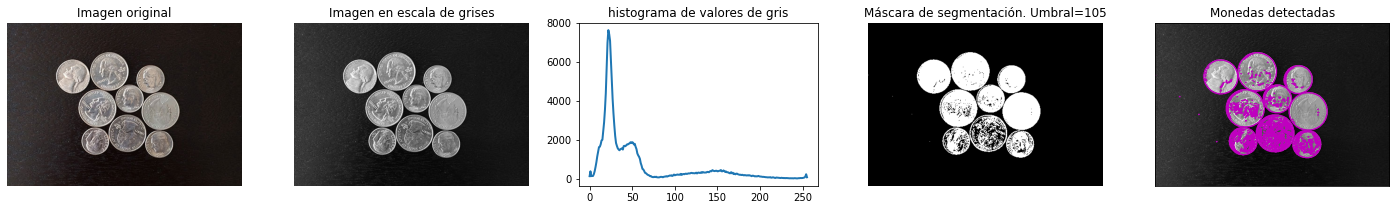

In [ ]:
hist, hist_centers = histogram(coins)
valorUmbral = [30, 105, 85, 80, 115] # Esta lista contiene el valor umbral para cada una de las imágenes mascaraUmbralizacion coins > valorUmbral[indexImg]. Esta máscara será la que se utilice en la evaluación
plt.figure(figsize=(30,3))
plt.subplot(1,6,1)
plt.imshow(img_original)
plt.title('Imagen original')
plt.axis('off')
plt.subplot(1,6,2)
plt.imshow(coins, cmap=plt.cm.gray)
plt.title('Imagen en escala de grises')
plt.axis('off') 
plt.subplot(1,6,3)
plt.plot(hist_centers, hist, lw=2)
plt.title('histograma de valores de gris')
plt.subplot(1,6,4)
plt.imshow(mascaraUmbralizacion, cmap=plt.cm.gray)
plt.title("Máscara de segmentación. Umbral="+str(valorUmbral[indexImg]))
plt.axis('off') #Se obtiene el valor umbral de la lista de valores umbrales establecida
plt.subplot(1,6,5)
plt.imshow(coins, cmap=plt.cm.gray)
plt.contour(mascaraUmbralizacion, [0.5], linewidths=1.4, colors='m')
plt.title('Monedas detectadas'), plt.xticks([]), plt.yticks([])
plt.show()

**2. Segmentación basada en contornos**
A continuación se incluye el método implementado para delinear los bordes de las monedas utilizando segmentación basada en contornos. Los pasos que se han seguido son los siguientes:
1. Obtención de bordes mediante el detector de bordes Canny.
2. Rellenado mediante operaciones morfológicas de los contornos detectados.
3. Eliminacion de artefactos espúreos con tamaño mínimo = 22, en caso de existir.
Como se puede ver en la imagen de la máscara de segmentación, los pequeños objetos espúreos se eliminan fácilmente estableciendo un tamaño mínimo para los objetos válidos. Sin embargo, este método no es muy robusto ya que, tal y como se observa por ejemplo con la imagen coins2.jpg , elimina ciertas partes relevantes de las monedas y no se rellenan correctamente los contornos que no están completamente cerrados.

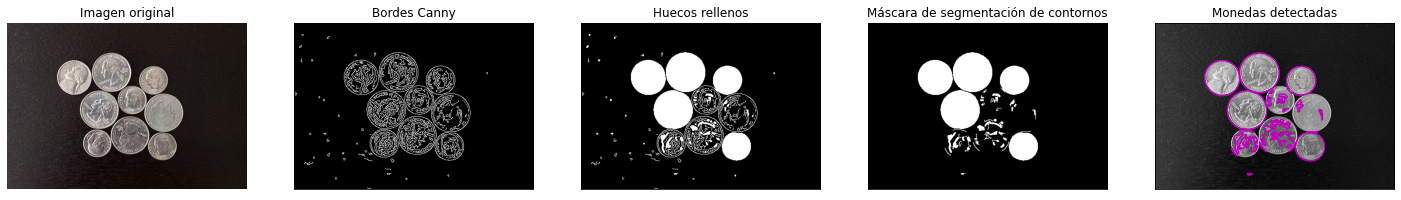

In [ ]:
from skimage.feature import canny
from scipy import ndimage as ndi
from skimage.filters import sobel
from skimage import morphology
from skimage import segmentation

bordesCanny = canny(coins)
coinsRellenadas = ndi.binary_fill_holes(bordesCanny)
mascaraContornos = morphology.remove_small_objects(coinsRellenadas, 22) # Esta máscara será la que utilicemos en l a evaluación
plt.figure(figsize=(30,20))
plt.subplot(1,6,1)
plt.imshow(img_original, cmap=plt.cm.gray)
plt.title('Imagen original')
plt.axis('off')
plt.subplot(1,6,2)
plt.imshow(bordesCanny, cmap=plt.cm.gray)
plt.title('Bordes Canny')
plt.xticks([])
plt.yticks([])
plt.subplot(1,6,3)
plt.imshow(coinsRellenadas, cmap=plt.cm.gray)
plt.title('Huecos rellenos')
plt.xticks([])
plt.yticks([])
plt.subplot(1,6,4)
plt.imshow(mascaraContornos, cmap=plt.cm.gray)
plt.title('Máscara de segmentación de contornos'),
plt.xticks([])
plt.yticks([])
plt.subplot(1,6,5)
plt.imshow(coins, cmap=plt.cm.gray)
plt.contour(mascaraContornos, [0.5], linewidths=1.4, colors='m')
plt.title('Monedas detectadas')
plt.xticks([])
plt.yticks([])
plt.show()

**3. Segmentación basada en regiones**
A continuación se describe la implementado de un método basado en regiones. Para ello se ha empleado el algoritmo Watershed presente en la libería scikit-image. Los pasos implementados para este método son los siguientes:
1. Creación de mapa de elevaciones utilizando el gradiente de Sobel de la imagen de las monedas.
2. Detección de los marcadores del fondo y las monedas basadas en las partes extremas del histograma de valores de grises de la imagen. Para todas las
imágenes se ha establecido como valor mínimo 20 y como valor máximo 150 , ya que son dos valores que funcionan correctamente con las cinco
imágenes seleccionadas.
3. Rellenado del mapa de elevaciones mediante el algoritmo Watershed junto con los marcadores detectados en el paso anterior.

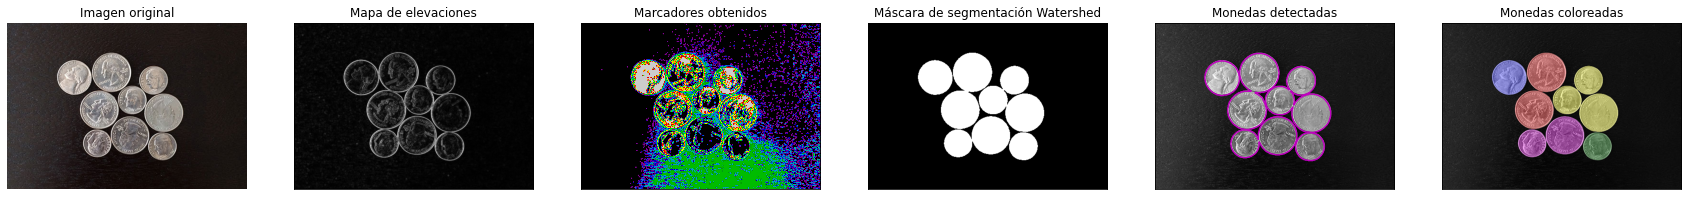

In [ ]:
from skimage.color import label2rgb
mapaDeElevacion = sobel(coins)
marcadores = np.zeros_like(coins)
marcadores[coins < 20] = 1
marcadores[coins > 150] = 2
mascaraWatershed = segmentation.watershed(mapaDeElevacion, marcadores) #Esta es la máscara que utilizaremos en la evaluación
mascaraWatershed = ndi.binary_fill_holes(mascaraWatershed - 1)
coinsEtiquetadas, _ = ndi.label(mascaraWatershed)
coinsColoreadas = label2rgb(coinsEtiquetadas, image=coins, bg_label=0)
plt.figure(figsize=(30,20))
plt.subplot(1,6,1)
plt.imshow(img_original, cmap=plt.cm.gray)
plt.title('Imagen original')
plt.axis('off')
plt.subplot(1,6,2)
plt.imshow(mapaDeElevacion, cmap=plt.cm.gray)
plt.title('Mapa de elevaciones')
plt.xticks([])
plt.yticks([])
plt.subplot(1,6,3)
plt.imshow(marcadores, cmap=plt.cm.nipy_spectral)
plt.title('Marcadores obtenidos')
plt.xticks([])
plt.yticks([])
plt.subplot(1,6,4)
plt.imshow(mascaraWatershed, cmap=plt.cm.gray)
plt.title('Máscara de segmentación Watershed')
plt.xticks([])
plt.yticks([])
plt.subplot(1,6,5)
plt.imshow(coins, cmap=plt.cm.gray)
plt.contour(mascaraWatershed, [0.5], linewidths=1.4, colors='m')
plt.title('Monedas detectadas')
plt.xticks([])
plt.yticks([])
plt.subplot(1,6,6)
plt.imshow(coinsColoreadas)
plt.title('Monedas coloreadas')
plt.xticks([])
plt.yticks([])
plt.show()

**Evaluación de los tres métodos de segmentación implementados**
Después de testear los tres métodos con las cinco imágenes seleccionadas se puede indicar que el que método que mejores resultados ofrece es el método de segmentación basado en regiones Watershed. Para dar una medida objetiva del comportamiento de los tres métodos implementados en la segmentación de las imágenes seleccionadas, se ha implementado un método adhoc basado en similaridad. Se ha estudiado la documentación de la librería scikit-image para su implementación del índice Jaccard. A continuación se detallan los pasos implementados para la obtención de las medidas de similaridad IoU:
1. Adquisición de la imagen de GroundTruth correspondiente a la imagen que se ha segmentado previamente con los tres métodos implementados.
2. Conversión de la imagen de GroundTruth a escala de grises. Previa a la conversión se realiza una corrección con umbralización para evitar la aparición
de artefactos externos generados por la función de conversión.
3. Generación del valor IoU de cada uno de las máscaras de segmentación de cada uno de los métodos en relación a la imagen de GroundTruth.
4. Representación e impresión de las máscaras de segmentación y los valores de similaridad obtenidos.

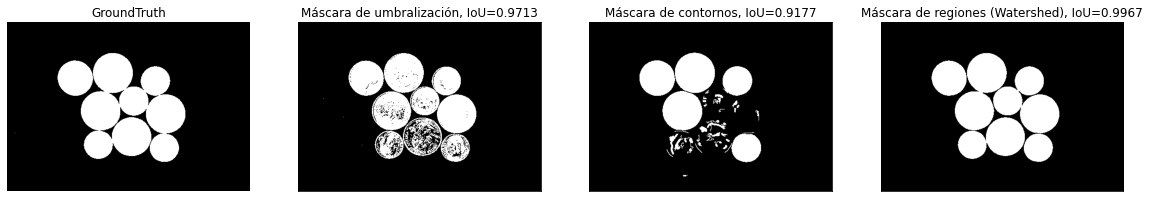

In [ ]:
from sklearn.metrics import jaccard_similarity_score
from warnings import simplefilter

simplefilter(action='ignore', category=FutureWarning) #Evita los futureWarnings
groundTruth = io.imread(imgsGroundTruth[indexImg])
groundTruth = groundTruth > 1 # Se añade debido a que la conversión a escala de grises introduce ruido en el exterior de las monedas de las imágenes de groundTruth
groundTruth = (rgb2gray(groundTruth)).astype('uint8')
iouSegUmbralizacion = jaccard_similarity_score(groundTruth.ravel(), mascaraUmbralizacion.ravel())
iouSegContornos =  jaccard_similarity_score(groundTruth.ravel(), mascaraContornos.ravel())
iouSegRegiones =  jaccard_similarity_score(groundTruth.ravel(), mascaraWatershed.ravel())
plt.figure(figsize=(20,20))
plt.subplot(1,4,1)
plt.imshow(groundTruth, cmap=plt.cm.gray)
plt.title('GroundTruth')
plt.axis('off')
plt.subplot(1,4,2)
plt.imshow(mascaraUmbralizacion, cmap=plt.cm.gray)
plt.title('Máscara de umbralización, IoU=%.4f' % iouSegUmbralizacion)
plt.xticks([])
plt.yticks([])
plt.subplot(1,4,3)
plt.imshow(mascaraContornos, cmap=plt.cm.gray)
plt.title('Máscara de contornos, IoU=%.4f' % iouSegContornos)
plt.xticks([])
plt.yticks([])
plt.subplot(1,4,4)
plt.imshow(mascaraWatershed, cmap=plt.cm.gray)
plt.title('Máscara de regiones (Watershed), IoU=%.4f' % iouSegRegiones)
plt.xticks([])
plt.yticks([])
plt.show()

**Referencias**
Scikit-learn team (2018). Comparing edge-based and region-based segmentation. 
Retrieved February 21, 2021, from https://scikit- image.org/docs/stable/auto_examples/applications/plot_coins_segmentation.html

Jiancheng, L., & Scikit-learn team (2015). Sklearn.metrics.jaccard_similarity_score. Retrieved February 21, 2021, from http://lijiancheng0614.github.io/scikit- learn/modules/generated/sklearn.metrics.jaccard_similarity_score.html

Li, J., & Scikit-learn team, (2016). API REFERENCE. Retrieved February 24, 2021, from http://lijiancheng0614.github.io/scikit- learn/modules/classes.html#module-sklearn.metrics

Carson, C., Stein, J., & Sitharaman, S. (2017, July 13). Using sklearn.metrics Jaccard index with images? Retrieved February 23, 2021, from
https://stackoverflow.com/questions/45065469/using-sklearn-metrics-jaccard-index-with-images

Desertnaut, Al Nazi, Z., & Mridulrb. (2020, December 08). Why are the outputs of jaccard_score and jaccard_similarity_score different? Retrieved February 24, 2021, from https://stackoverflow.com/questions/61790069/why-are-the-outputs-of-jaccard-score-and-jaccard-similarity-score-different